<a href="https://colab.research.google.com/github/pandu1992/PraktikumDataScience/blob/main/PRAKTIKUM_DS_RETAIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDIKSI PENJUALAN RETAIL**

# 1. PENDAHULUAN

📊 Tentang Proyek
Dalam dunia ritel, kemampuan untuk memprediksi penjualan dengan akurat sangat penting untuk membuat keputusan bisnis yang cerdas. Proyek ini berfokus pada pembuatan model untuk meramalkan penjualan dengan menggunakan dataset yang mencakup berbagai faktor yang memengaruhi penjualan, seperti diskon, pengeluaran pemasaran, dan tren musiman seperti hari libur.

Proyek ini tidak hanya bertujuan untuk memprediksi penjualan, tetapi juga mengevaluasi kinerja berbagai model, seperti regresi linear, decision tree, dan metode gradient boosting. Perbandingan ini akan membantu mengidentifikasi model yang paling efektif dalam meningkatkan akurasi peramalan penjualan di dunia ritel nyata.

🔑 Tujuan Utama:
✅ Membangun dan membandingkan berbagai model untuk memprediksi penjualan ritel.
✅ Menganalisis bagaimana faktor seperti pemasaran, diskon, dan hari libur memengaruhi penjualan.
✅ Menemukan model yang paling efektif untuk meramalkan penjualan di masa depan.

# 2. IMPORT PUSTAKA YANG DIBUTUHKAN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

custom_palette = ['#1560B0', '#C33B2F', '#EAD59F', '#6AA8CD', '#D69642', '#D6E5EE', '#695D5E']
sns.set_theme(context='notebook', palette=custom_palette, style='whitegrid')

In [4]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# 3. IMPORT DATA DAN MEMAHAMI DATA

In [9]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Path to your dataset on Google Drive
file_path = '/content/drive/MyDrive/Retail_Dataset/Retail and wherehouse Sale.csv'

df = pd.read_csv(file_path)
print("First 5 records:", df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First 5 records:    YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   

                      ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                  BOOTLEG RED - 750ML      WINE          0.00   
1            MOMENT DE PLAISIR - 750ML      WINE          0.00   
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER          0.00   
3        SCHLINK HAUS KABINETT - 750ML      WINE          0.00   
4       SANTORINI GAVALA WHITE - 750ML      WINE          0.82   

   RETAIL TRANSFERS  WAREHOUSE SALES  
0               0.0              2.0  


In [10]:
df.shape # digunakan untuk mengetahui jumlah baris dan kolom dalam sebuah DataFrame di pandas.

(30000, 9)

In [11]:
df.describe() #digunakan untuk menampilkan ringkasan statistik deskriptif dari data numerik dalam sebuah DataFrame pandas.

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,30000.0,30000.000000,29999.000000,30000.000000,30000.000000
mean,2020.0,3.911467,6.939796,6.594058,27.431031
std,0.0,2.836788,33.081054,27.879428,272.166085
min,2020.0,1.000000,-0.420000,-6.000000,-3999.000000
25%,2020.0,1.000000,0.000000,0.000000,0.000000
50%,2020.0,3.000000,0.160000,0.000000,1.000000
75%,2020.0,7.000000,2.920000,3.000000,6.000000
max,2020.0,9.000000,2739.000000,1507.000000,18317.000000


In [12]:
df.info() #digunakan untuk menampilkan ringkasan informasi tentang DataFrame dalam pandas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              30000 non-null  int64  
 1   MONTH             30000 non-null  int64  
 2   SUPPLIER          29967 non-null  object 
 3   ITEM CODE         30000 non-null  object 
 4   ITEM DESCRIPTION  30000 non-null  object 
 5   ITEM TYPE         30000 non-null  object 
 6   RETAIL SALES      29999 non-null  float64
 7   RETAIL TRANSFERS  30000 non-null  float64
 8   WAREHOUSE SALES   30000 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.1+ MB


In [13]:
# Check for missing values
df.isnull().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,33
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,0
RETAIL SALES,1
RETAIL TRANSFERS,0
WAREHOUSE SALES,0


In [15]:
df['ITEM CODE'].nunique() #digunakan untuk menghitung jumlah nilai unik (distinct) dalam kolom "ITEM CODE" pada DataFrame.

15668

In [17]:
df['SUPPLIER'].nunique()

290

**Initial data exploration reveals the following key points:**



*   Observations🧮: The dataset consists of 30,000 rows and 9 columns.
*   Missing Values⚠️ : There are two missing value are present in the dataset SUPPLIER dan RETAIL SALES.
*   Column Types📊 : The dataset includes a mix of integers, floats, objects values.
*Year: Only 2020 (no variation)
*Month: Ranges from 1 to 9
*Retail Sales, Transfers, Warehouse Sales:
*Mean: Retail Sales ~6.94, Transfers ~6.59, Warehouse Sales ~27.43
High Variability: Std dev is large, especially in Warehouse Sales (272.17)
*Min & Max:
*Negative values exist (e.g., -3999 in Warehouse Sales) → Possible errors or returns
*Max values are very large → Outliers likely present
*Median (50%) is low → Data distribution is skewed
*🔍 Next Steps: Handle missing values, outliers, and negative sales before modeling!

# 4. Exploratory Data Analysis

✨ Pairplot

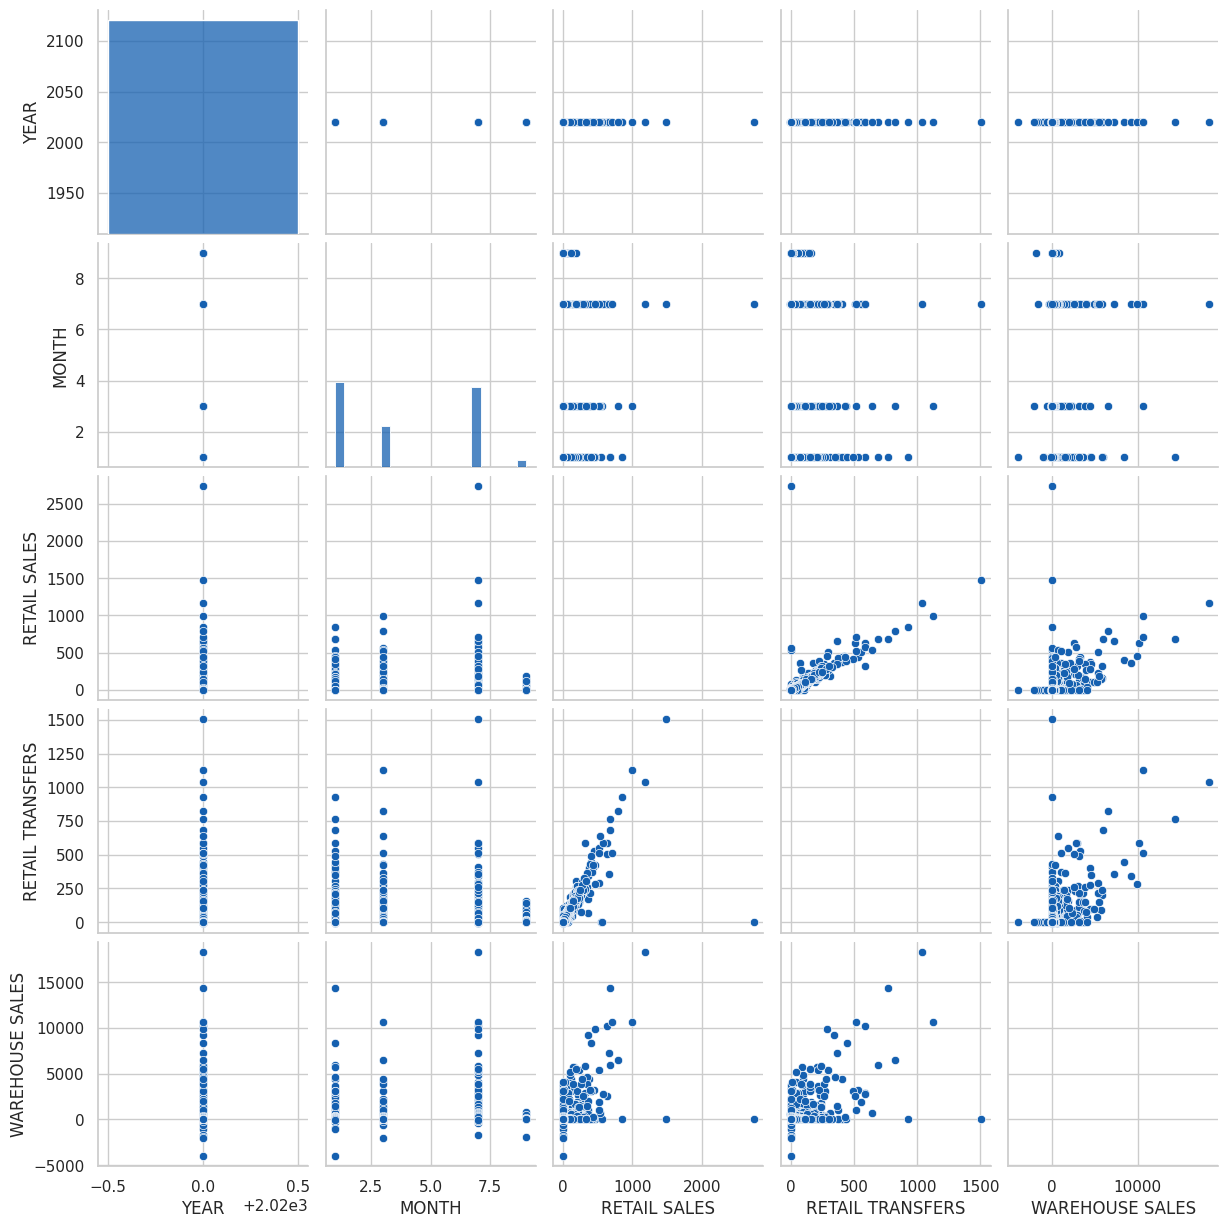

In [18]:
sns.pairplot(df)
plt.show()

📉 Histograms

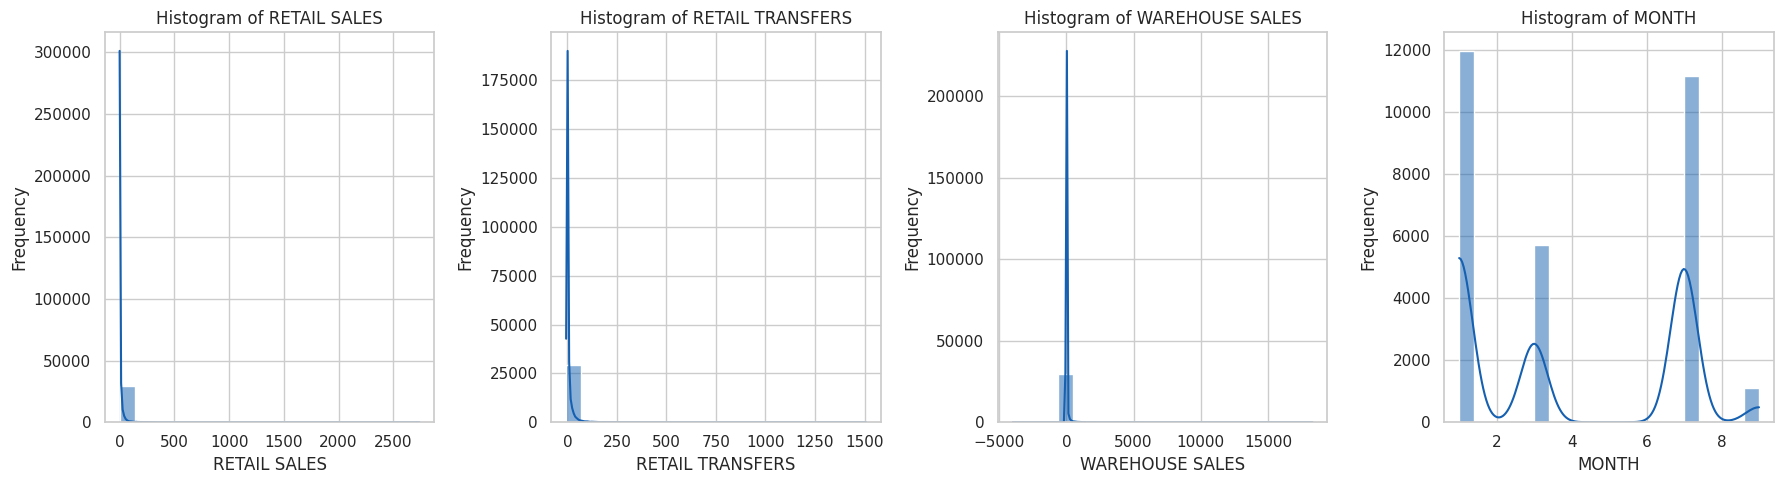

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_to_plot = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES','MONTH']

# Create a figure with subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 5))  # 1 row, 4 columns

# Plot histograms on each subplot
for i, column in enumerate(numerical_cols_to_plot):
    sns.histplot(data=df, x=column, kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)  # Add x-axis label
    axes[i].set_ylabel('Frequency')  # Add y-axis label

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

📊 Countplots

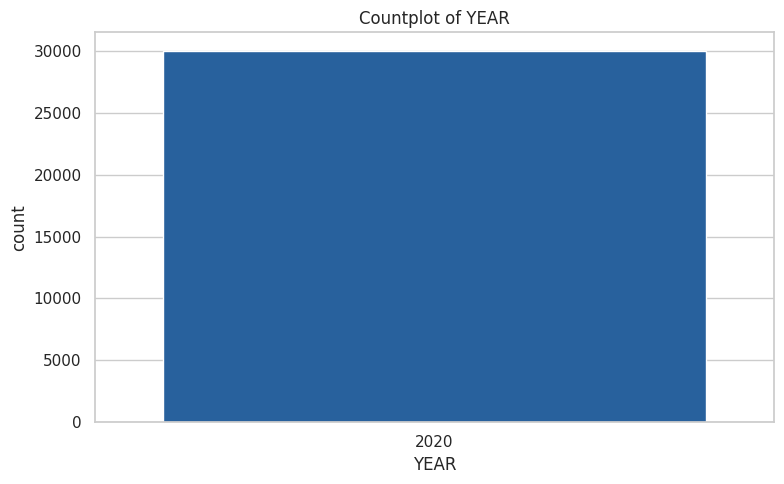

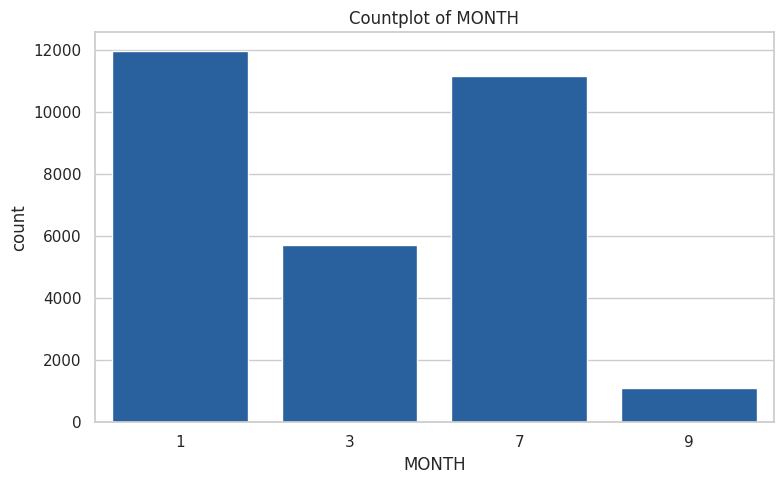

In [23]:
categorical_columns_to_plot = ['YEAR', 'MONTH']

# Plot countplots for each categorical column
for column in categorical_columns_to_plot:

    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')

    plt.tight_layout()
    plt.show()

🥧 Pie Chart

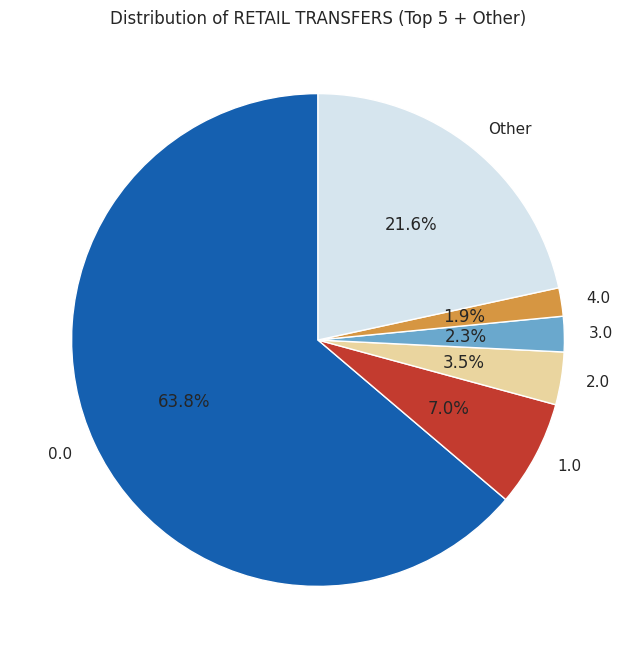

In [25]:
import matplotlib.pyplot as plt

# Get the top 5 most frequent values and their counts
top_n = 5  # Number of top values to display
top_values = df['RETAIL TRANSFERS'].value_counts().nlargest(top_n)
other_count = df['RETAIL TRANSFERS'].value_counts().sum() - top_values.sum()  # Count of all other values

# Create labels for the pie chart
labels = top_values.index.tolist() + ['Other']  # Add 'Other' category
counts = top_values.tolist() + [other_count]  # Add count for 'Other' category

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=custom_palette)
plt.title('Distribution of RETAIL TRANSFERS (Top 5 + Other)')
plt.show()

📦 Box plots

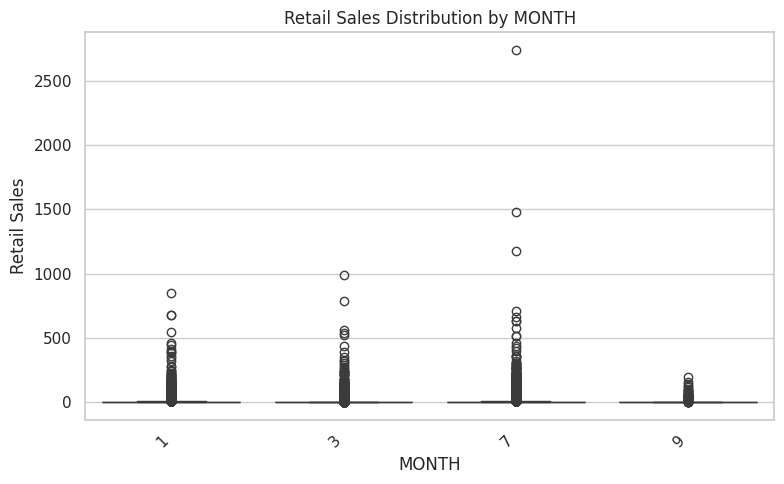

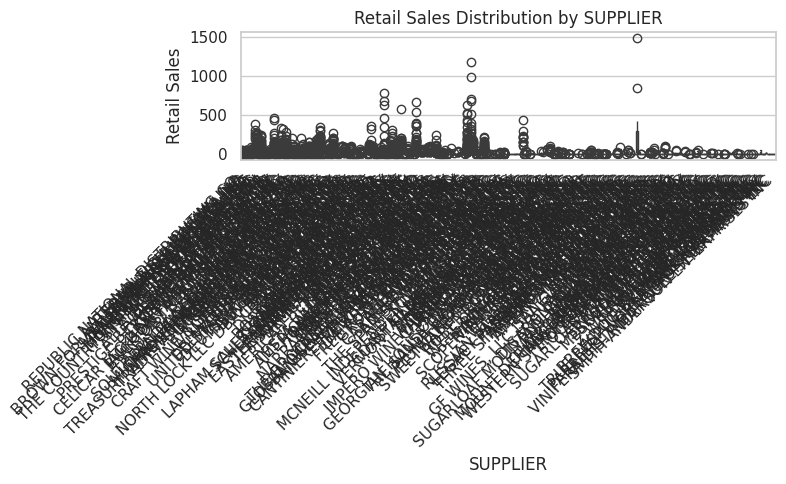

Exception ignored in: <function _xla_gc_callback at 0x7f3d9dd55080>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


In [ ]:
columns_to_plot = ['MONTH', 'SUPPLIER', 'ITEM CODE']  # Replaced 'YEAR' with 'ITEM CODE'

# Plot box plots
for column in columns_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=column, y='RETAIL SALES')
    plt.title(f'Retail Sales Distribution by {column}')
    plt.xlabel(column)
    plt.ylabel('Retail Sales')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.tight_layout()
    plt.show()